# Clase: Análisis de Clustering

## 1. Introducción al Aprendizaje No Supervisado

### 1.1. Concepto de Aprendizaje No Supervisado

- **Problema**: ¿Cómo clasificar a clientes con características similares en el mismo clúster?
- **Resultado del análisis**: Inducir grupos de clientes con características similares.
- **Aplicación 1**: Fragmentación de clientes.
  - Comprender las características demográficas, sociales y físicas de cada grupo de clientes.
  - Realizar el perfil del grupo y comprender sus características.
- **Aplicación 2**: Análisis adicional de cada clúster.
  - Comprender la distribución general de los datos.
  - Análisis adicional de cada grupo.

## 2. Análisis de Clustering

### 2.1. Métodos de Clustering

- **Métodos Jerárquicos**:
  - **Enlace simple, completo, promedio**.
  - **Método basado en el centro**.
  - **Método de Ward**.

- **Métodos No Jerárquicos**:
  - **Clustering de K-means**.
  - **Clustering de K-medoids (PAM)**.
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**.
  - **Mapa Auto-organizado (SOM)**.
  - **Clustering Difuso**.

## 3. Análisis Jerárquico (Unidad 02)

### 3.1. Clustering Jerárquico Aglomerativo

- Se enfoca en la construcción de una jerarquía de clústeres desde los puntos individuales hasta que se forma un único clúster que contiene todos los puntos.
- **Ejemplos**:
  - **Dendrograma**: Representación gráfica de la jerarquía de clústeres.
  
### 3.2. Clustering Jerárquico Divisivo

- Comienza con todos los puntos en un único clúster y los divide recursivamente hasta que cada punto se encuentra en su propio clúster.

## 4. Clustering K-means (Unidad 03)

### 4.1. Introducción a K-means

- **Algoritmo de Partición**: Divide los datos en un número fijo de clústeres.
- **Aplicaciones**:
  - Clasificación de clientes.
  - Segmentación de mercado.
  
### 4.2. Otros Métodos de Clustering

- **DBSCAN**:
  - Utilizado cuando los clústeres tienen formas arbitrarias y no es necesario fijar el número de clústeres de antemano.
  - **Ventajas**: Identifica clústeres de forma densa y maneja puntos de ruido.
  - **Ejemplo**: Si hay una región densa en el "núcleo" y otra región densa en la "capa", DBSCAN podría identificar ambas como clústeres separados, mientras que K-means podría no distinguirlos.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons

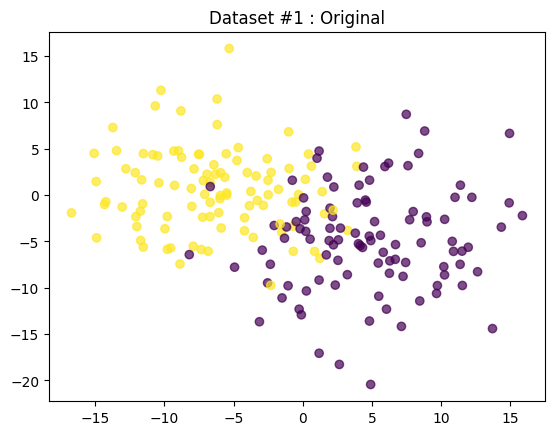

In [19]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

In [6]:
X1

array([[ 4.83455936e+00,  1.61209639e+00],
       [-7.19342110e+00,  1.57331116e+00],
       [-1.19919003e+01, -3.38784956e+00],
       [ 8.94965320e+00, -2.34628131e+00],
       [ 5.46630481e+00, -7.33334000e+00],
       [-9.82679362e-01,  2.87439331e+00],
       [ 4.82713114e+00, -1.35870919e+01],
       [-5.95639441e+00, -4.86198432e-02],
       [ 3.25723451e+00, -3.81242660e+00],
       [-1.49388489e+01,  1.46494770e+00],
       [-9.32588959e+00,  4.75039194e+00],
       [ 1.23752259e+00, -6.81998526e+00],
       [ 1.19728386e+01, -5.62837526e+00],
       [-2.58199902e-01, -1.23070271e+01],
       [ 1.49590341e+01,  6.65671714e+00],
       [ 2.25314845e-01, -3.91267708e+00],
       [-5.93898363e+00,  2.41971297e+00],
       [-4.66024882e+00,  5.12509843e+00],
       [-2.49261965e+00,  3.07334679e-02],
       [ 7.73413068e+00, -2.65986906e+00],
       [-5.12306455e-01, -7.42476287e-01],
       [ 1.57887480e+00, -2.01725863e+00],
       [-4.20565001e+00, -2.44769569e+00],
       [-4.

In [8]:
# convertir X1 a dataframe
df1 = pd.DataFrame(X1, columns=['x1','x2'])
df1.head()

,x1,x2
0,4.834559,1.612096
1,-7.193421,1.573311
2,-11.991900,-3.387850
3,8.949653,-2.346281
4,5.466305,-7.333340


In [9]:
df1.describe()

,x1,x2
count,200.000000,200.000000
mean,-0.774711,-2.157525
std,7.408317,5.661934
min,-16.720646,-20.432488
25%,-6.686835,-5.663270
50%,-0.596134,-2.114956
75%,4.653475,1.660352
max,15.891210,15.819423


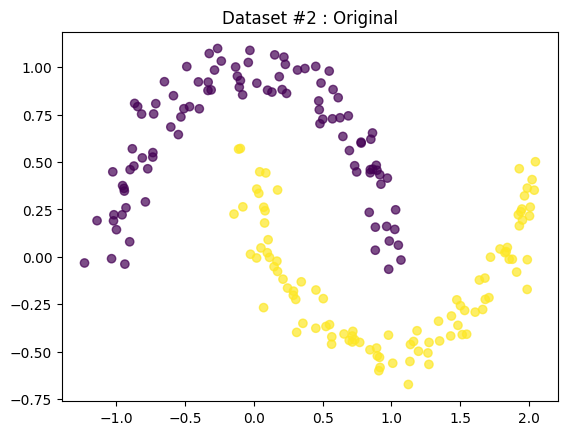

In [10]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

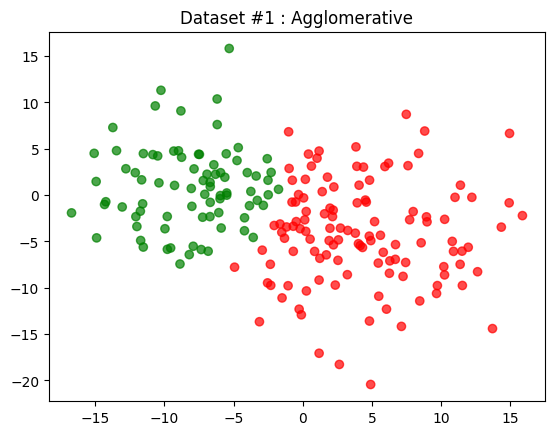

In [22]:
# Dataset #1 and two clusters
# Instanciar
agglo = AgglomerativeClustering(n_clusters=2)

# Ajustar
agglo.fit(X1)

# Visualizar los puntos
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : Agglomerative')
plt.show()

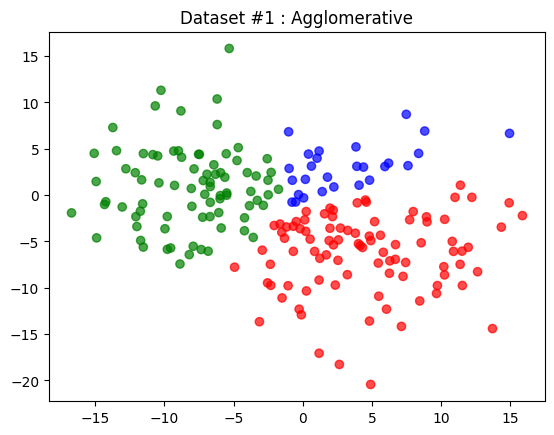

In [23]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd

# Dataset #1 and three clusters
# Instanciar
agglo3 = AgglomerativeClustering(n_clusters=3)

# Ajustar
agglo3.fit(X1)

# Visualizar los puntos
myColors = {0: 'red', 1: 'green', 2: 'blue'}  # Define a color palette: 0~2.
plt.scatter(X1[:, 0], X1[:, 1], c=pd.Series(agglo3.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1 : Agglomerative')
plt.show()


<ipython-input-27-a037b58f3f77>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


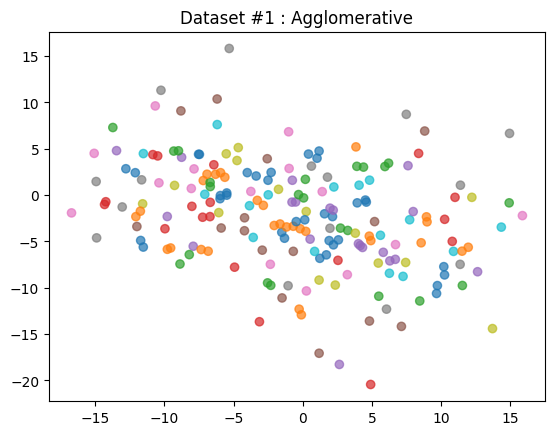

In [27]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
plt.scatter(X1[:, 0], X1[:, 1], c=pd.Series(agglo2.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-26-169063ce104f>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


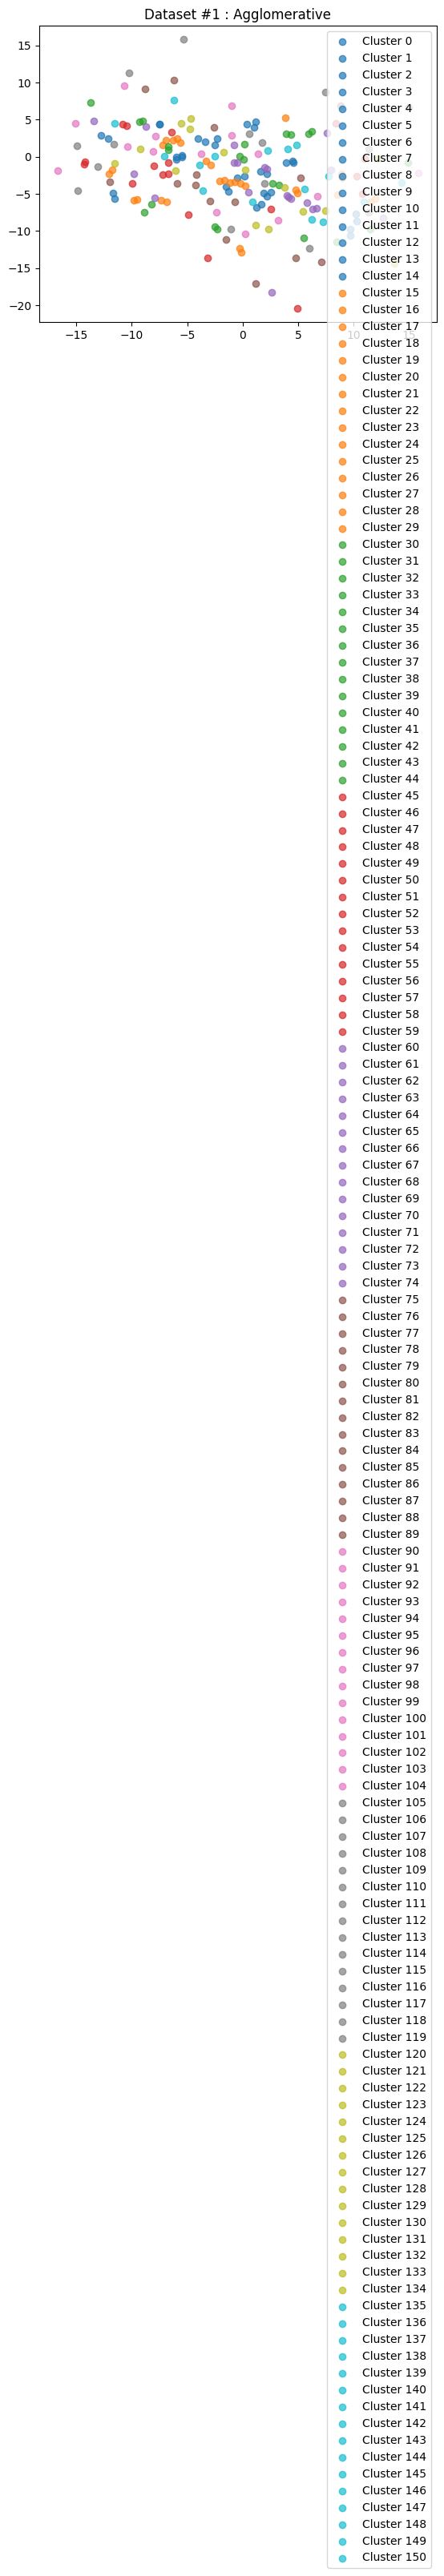

In [26]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-28-10b01374af6a>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


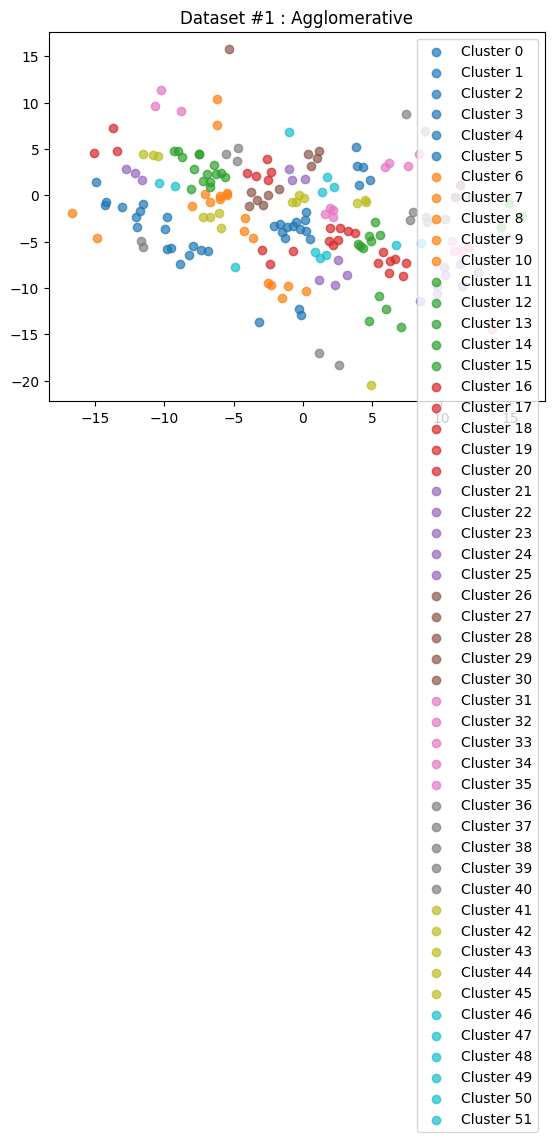

In [28]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=3.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-29-7f301b5b417c>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


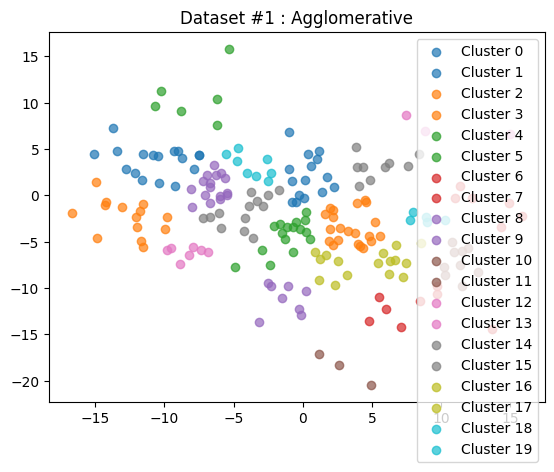

In [29]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=10.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-30-1c7e595be589>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


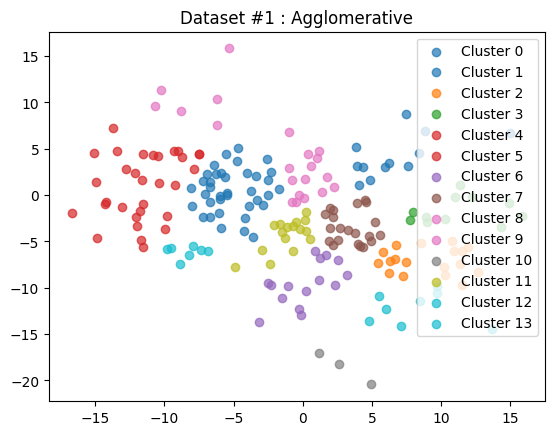

In [30]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=16.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-31-07c16e2260b3>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


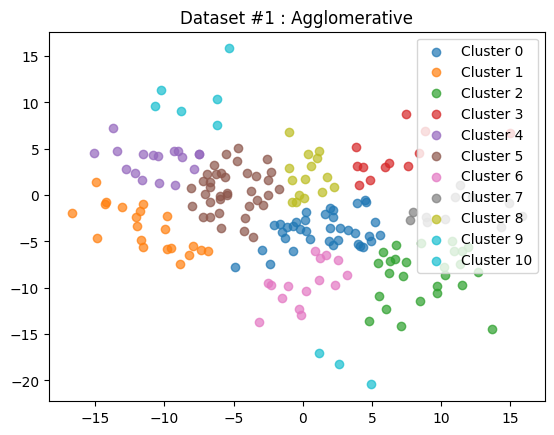

In [31]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=20.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-32-eba687ae57fd>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


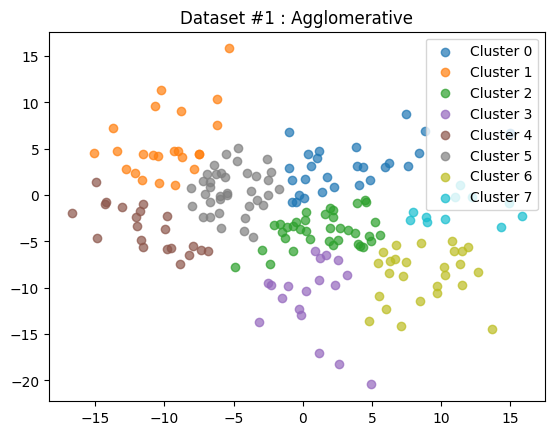

In [32]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=28.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-33-8e5f1a6775cb>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


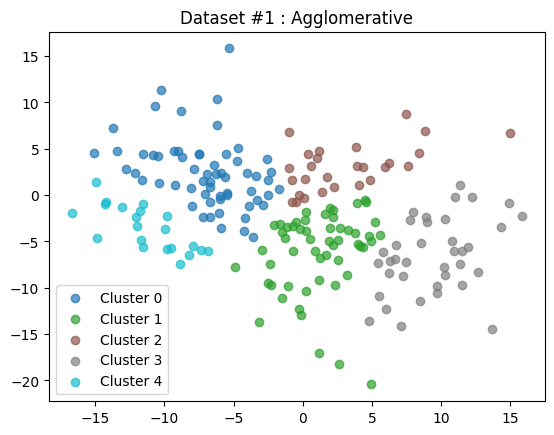

In [33]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=40.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

<ipython-input-40-10b7592bd182>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


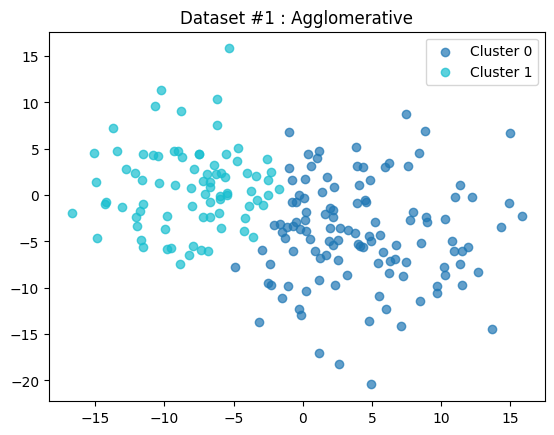

In [40]:
# Dataset #1 with distance threshold
# Instanciar
agglo2 = AgglomerativeClustering(n_clusters=None, distance_threshold=65.9, compute_full_tree=True)

# Ajustar
agglo2.fit(X1)

# Obtener el número de clusters
num_clusters = len(np.unique(agglo2.labels_))

# Crear un diccionario de colores dinámico
colors = plt.cm.get_cmap('tab10', num_clusters)
myColors = {i: colors(i) for i in range(num_clusters)}

# Visualizar los puntos
for cluster_label in range(num_clusters):
    plt.scatter(X1[agglo2.labels_ == cluster_label, 0],
                X1[agglo2.labels_ == cluster_label, 1],
                color=myColors[cluster_label],
                label=f'Cluster {cluster_label}',
                alpha=0.7)

# Agregar leyenda
plt.legend()
plt.title('Dataset #1 : Agglomerative')
plt.show()

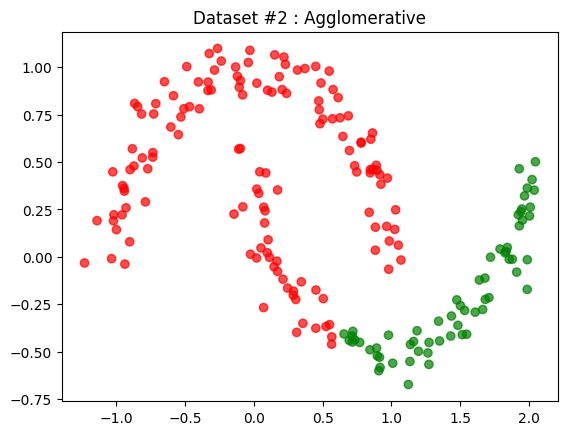

In [41]:
# Dataset #2 and two clusters.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : Agglomerative')
plt.show()

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

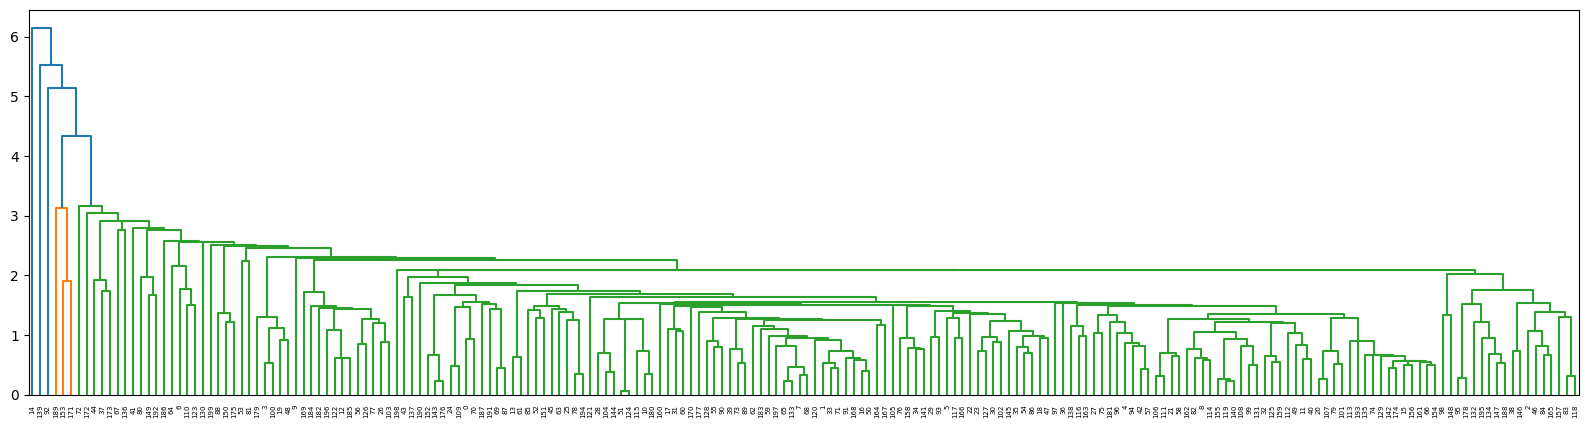

In [43]:
# Dataset #1 and show dendrogram.
myLinkage = linkage(X1,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [44]:
# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()

,count
1,197
4,1
2,1
3,1


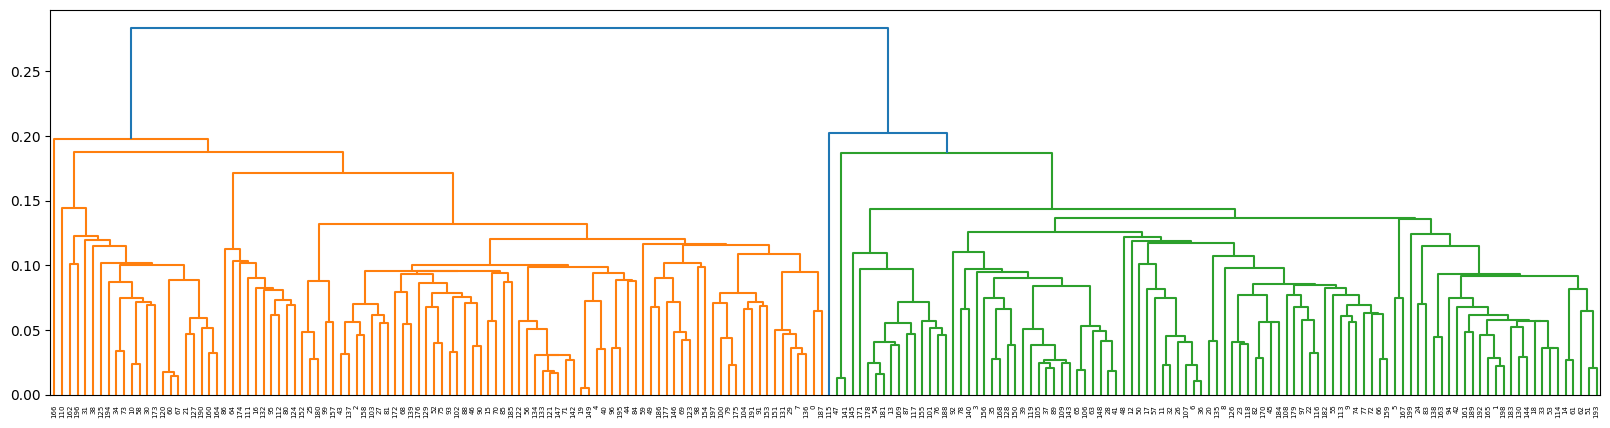

In [45]:
# Dataset #2 and show dendrogram.
myLinkage = linkage(X2,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [46]:
# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()

,count
1,100
2,100


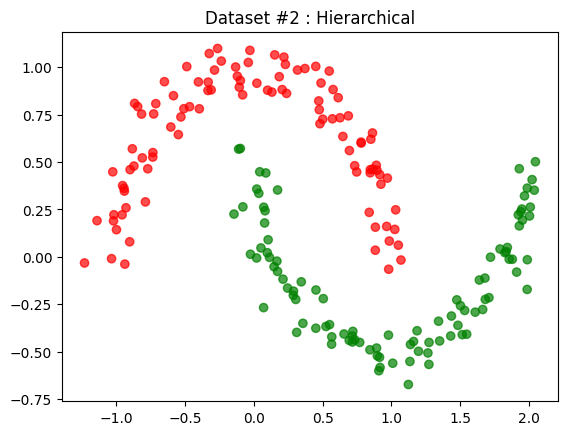

In [47]:
myColors = {1:'red',2:'green'}                                                # Define a color palette: 1~2.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : Hierarchical')
plt.show()

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()

In [49]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [50]:
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
irisML = iris_data_pd.iloc[:,2:4]

In [53]:
irisML

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


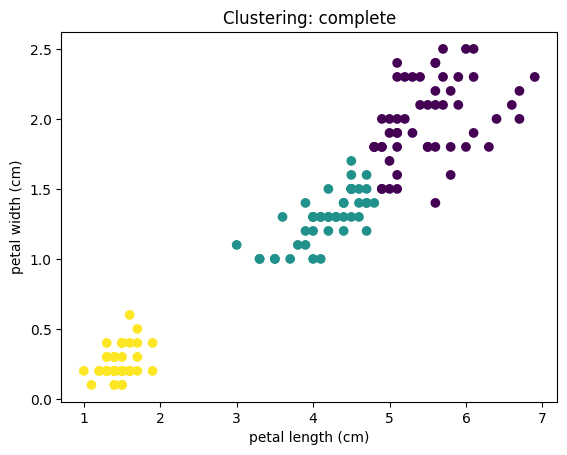

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


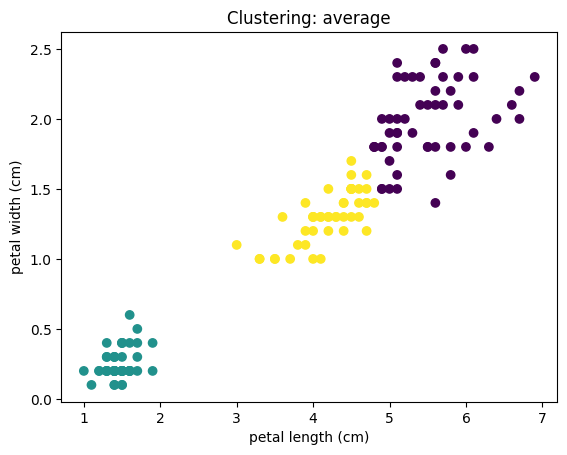

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


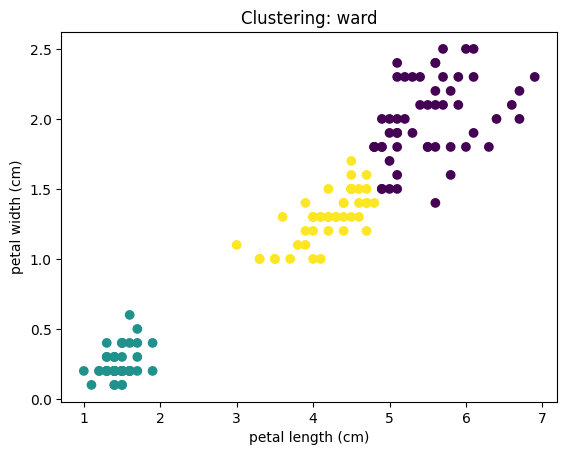

In [54]:
linkage = ["complete", "average", "ward"]
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage=i)
    hier.fit(irisML)
    plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=hier.labels_)
    plt.title(f"Clustering: {i}")
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.show()

In [56]:
from scipy.cluster import hierarchy

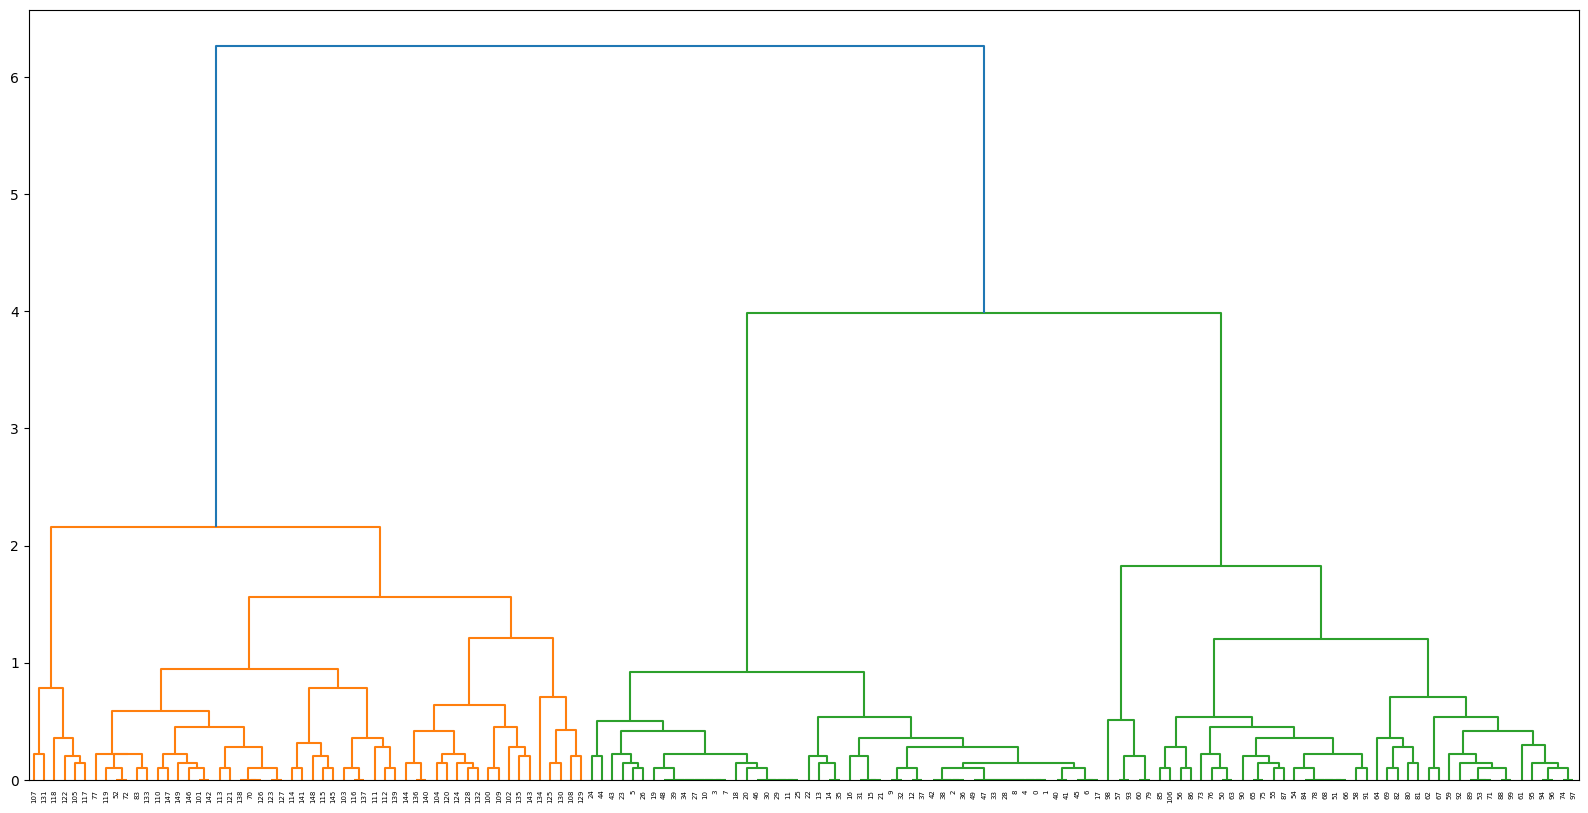

In [57]:
hierar = hierarchy.linkage(irisML, "complete")
plt.figure(figsize=(20,10))
dendrogram(hierar)
plt.show()

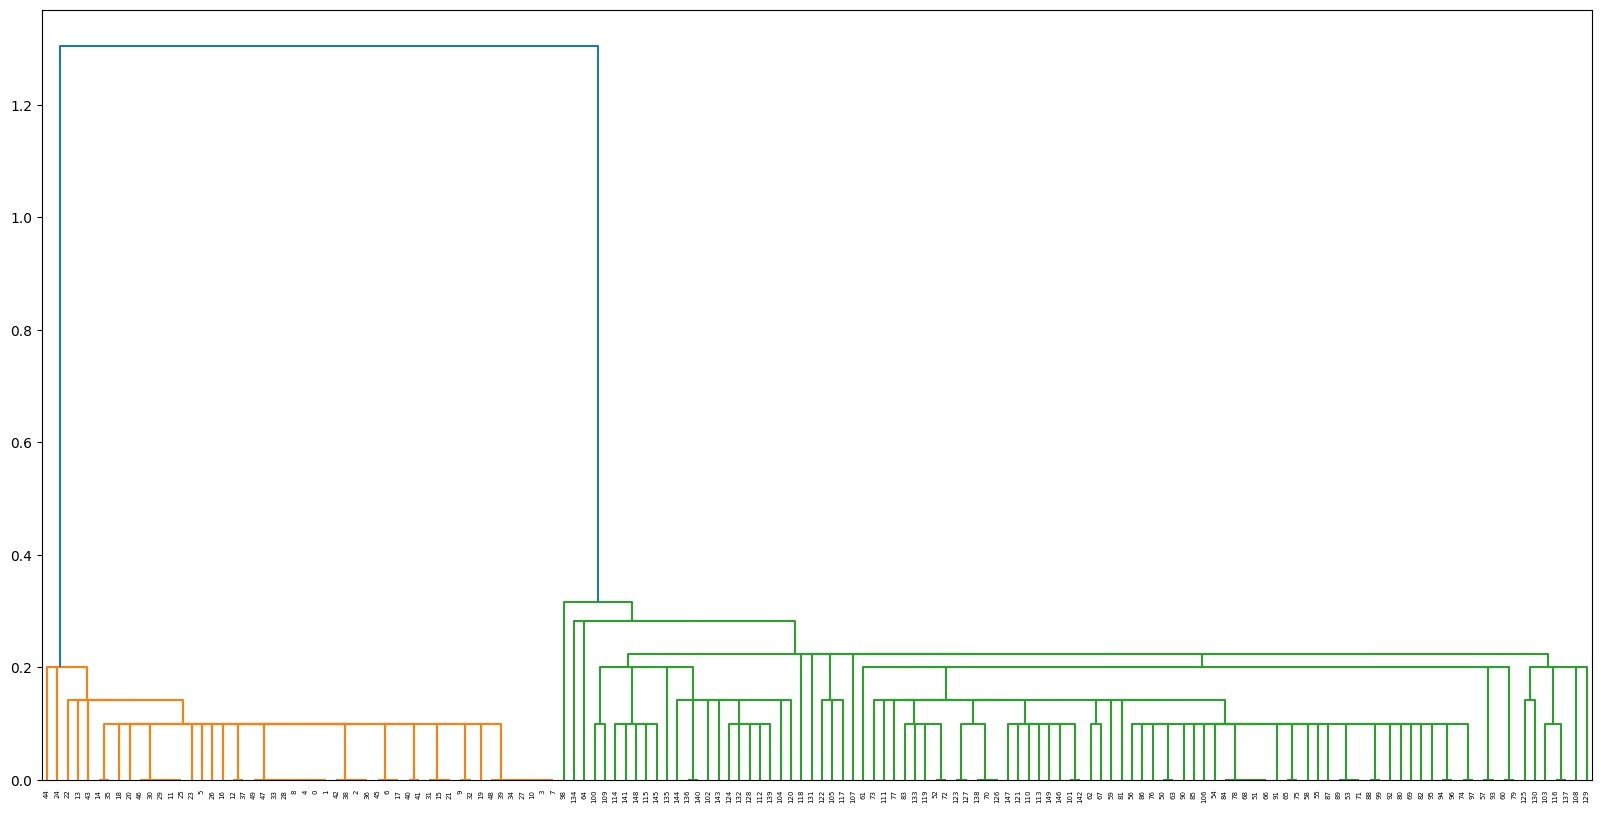

In [58]:
hierar = hierarchy.linkage(irisML, "single")
plt.figure(figsize=(20,10))
dendrogram(hierar)
plt.show()

#Kmeans

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

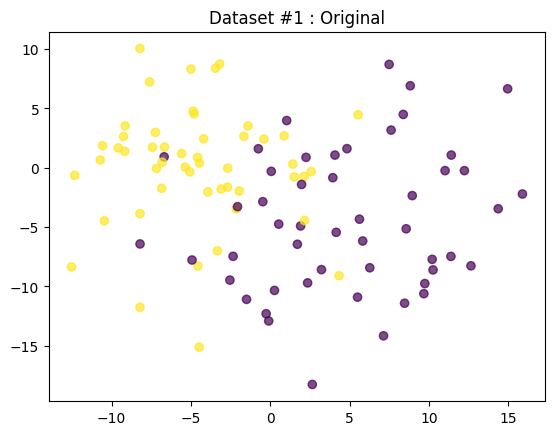

In [65]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

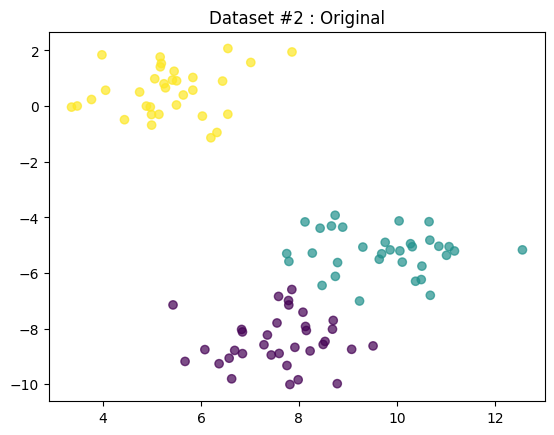

In [66]:
# Dataset #2
X2, label2 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std = 1, random_state=321)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

In [67]:
# Dataset #1 and two clusters / Instanciar el modelo
kmeans = KMeans(n_clusters=2,random_state=123, n_init='auto')                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.

In [68]:
# Ajuste del modelo
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.

KMeans(n_clusters=2, n_init='auto', random_state=123)

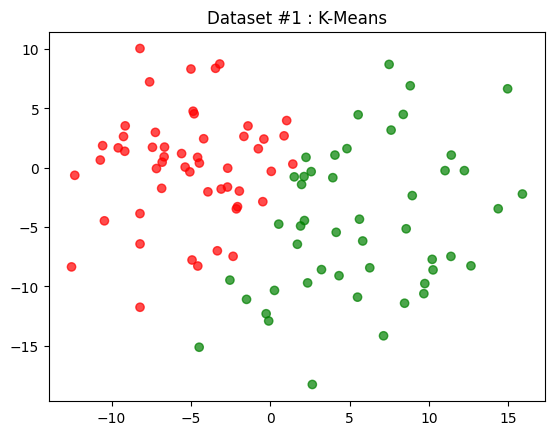

In [69]:
# Visualización del scatter plot
myColors = {0:'red',1:'green', 2:'blue'}                       # Define a color palette: 0~2.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : K-Means')
plt.show()

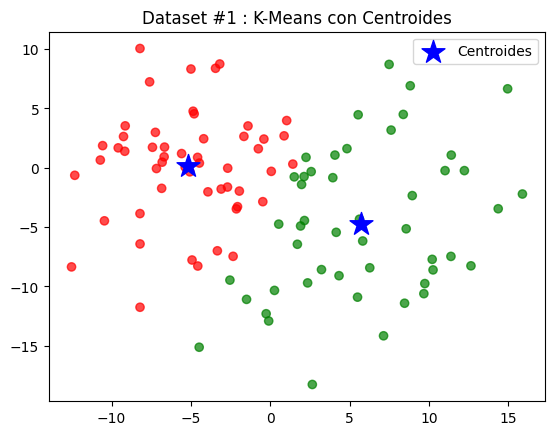

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Instanciar el modelo KMeans para 2 clusters
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X1)  # Ajuste del modelo

# Define una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green', 2: 'blue'}

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los centroides como estrellas
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='blue', label='Centroides')

plt.title('Dataset #1 : K-Means con Centroides')
plt.legend()
plt.show()

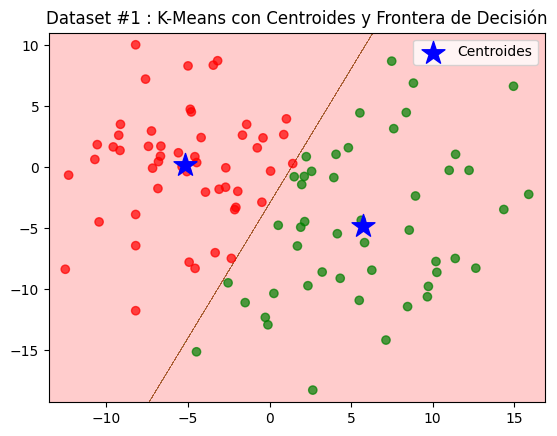

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Instanciar el modelo KMeans para 2 clusters
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X1)  # Ajuste del modelo

# Define una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los centroides como estrellas
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='blue', label='Centroides')

plt.title('Dataset #1 : K-Means con Centroides y Frontera de Decisión')
plt.legend()
plt.show()


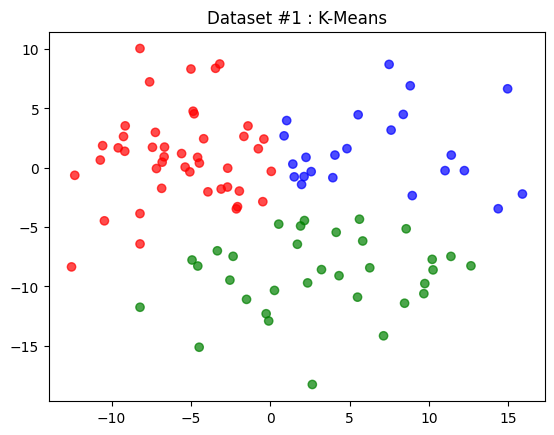

In [71]:
# Dataset #1 and three clusters.
kmeans = KMeans(n_clusters=3,random_state=123, n_init='auto')                 # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : K-Means')
plt.show()

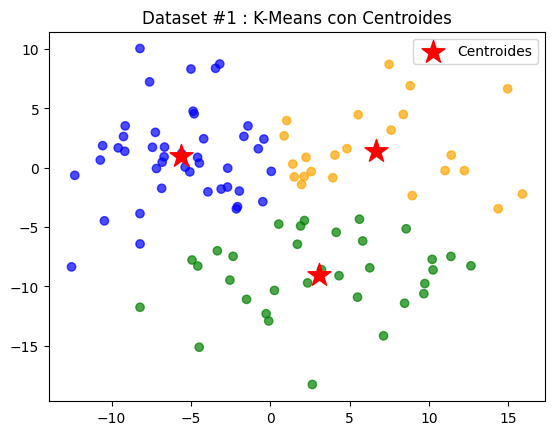

In [72]:
# Crear objeto KMeans para 3 clusters
kmeans = KMeans(n_clusters=3, random_state=123, n_init='auto')
kmeans.fit(X1)  # Aprendizaje no supervisado, solo se usa X1

# Colores personalizados para los clusters
myColors = {0: 'blue', 1: 'green', 2: 'orange'}

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los centroides como estrellas
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroides')

plt.title('Dataset #1 : K-Means con Centroides')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

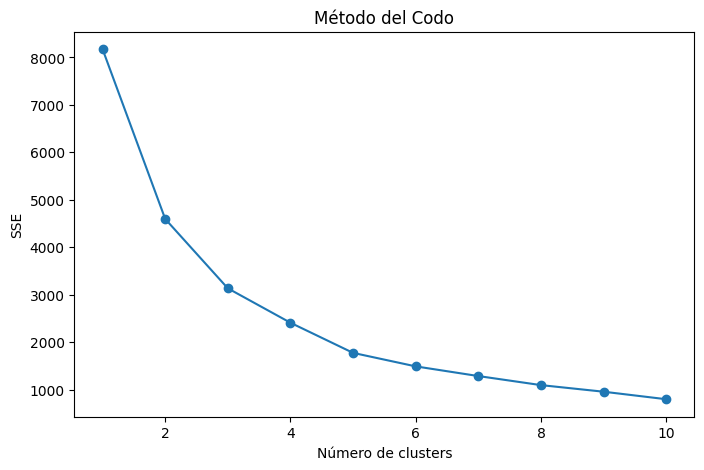

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar la suma de los errores cuadráticos
sse = []

# Probar diferentes números de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)  # inertia_ es el SSE

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

In [74]:
%pip install kneed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

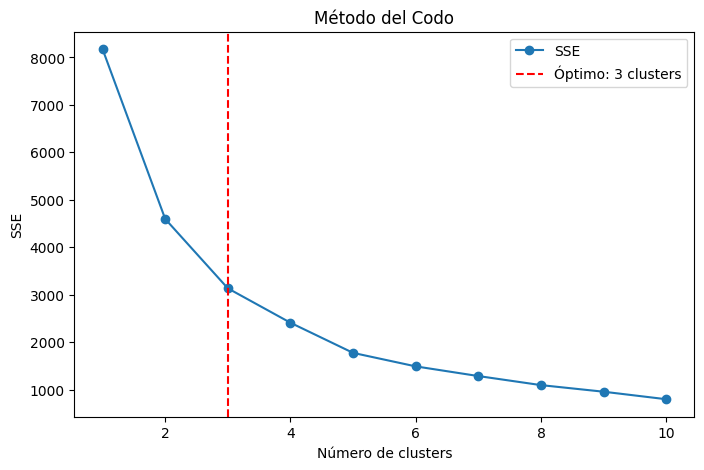

In [75]:
import numpy as np
from kneed import KneeLocator

# Lista para almacenar la suma de los errores cuadráticos (SSE)
sse = []

# Probar diferentes números de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)

# Usar KneeLocator para encontrar el "codo"
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow

# Graficar el método del codo con el mejor número de clusters marcado
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', label='SSE')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Óptimo: {optimal_k} clusters')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

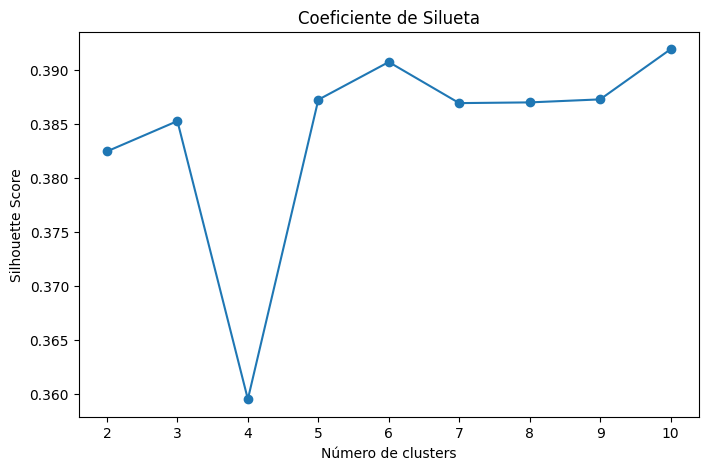

In [76]:
from sklearn.metrics import silhouette_score

# Lista para almacenar los valores de la silueta
silhouette_scores = []

# Probar diferentes números de clusters
for k in range(2, 11):  # Silhouette no está definido para k=1
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X1)
    score = silhouette_score(X1, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

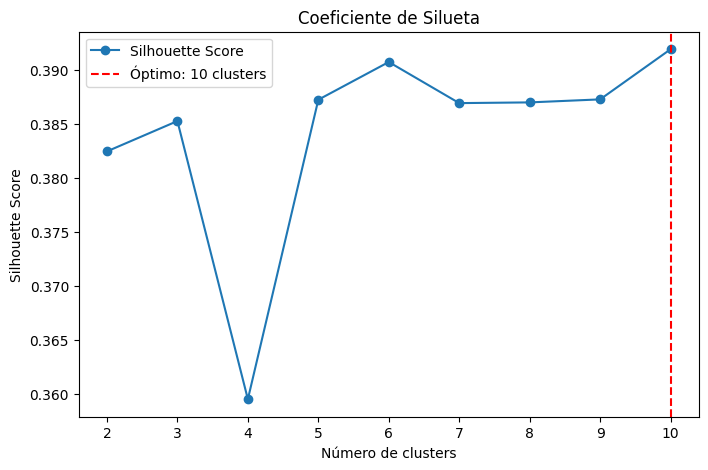

In [77]:
# Lista para almacenar los valores de la silueta
silhouette_scores = []

# Probar diferentes números de clusters
for k in range(2, 11):  # Silhouette no está definido para k=1
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X1)
    score = silhouette_score(X1, kmeans.labels_)
    silhouette_scores.append(score)

# Encontrar el número óptimo de clusters
optimal_k_silhouette = np.argmax(silhouette_scores) + 2  # +2 porque el rango empieza en 2

# Graficar el coeficiente de silueta con el mejor número de clusters marcado
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.axvline(x=optimal_k_silhouette, linestyle='--', color='red', label=f'Óptimo: {optimal_k_silhouette} clusters')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()